**Part 1**

The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split

Step 1: Import Data

In [2]:
# Using Google Colab and importing file from drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Importing file

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Part- 1 - Signal.csv')

In [4]:
df.head()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

Step 2: Data analysis & visualisation

• Perform relevant and detailed statistical analysis on the data.

• Perform relevant and detailed uni, bi and multi variate analysis.

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns. 

In [5]:
# Let us check if we have blank values

df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [6]:
# Let us check the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Let us do statistical analysis

df.describe()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
count  1599.000000  1599.000000  ...   1599.000000      1599.000000
mean      8.319637     0.527821  ...     10.422983         5.636023
std       1.741096     0.179060  ...      1.065668         0.807569
min       4.600000     0.120000  ...      8.400000         3.000000
25%       7.100000     0.390000  ...      9.500000         5.000000
50%       7.900000     0.520000  ...     10.200000         6.000000
75%       9.200000     0.640000  ...     11.100000         6.000000
max      15.900000     1.580000  ...     14.900000         8.000000

[8 rows x 12 columns]

We need to perform normalization as we have different values for different parameters. We will do this at the time of building NN.

Output (signal strength) is in between 3 and 8.

We do have outliers for some parameters as 75% and max and 25% and min has a significant difference. We will need to remove outliers.

Only for parameter 7 we see there is a significant difference between mean and 50 %. It also has outliers. This data might be skewed.

In [8]:
# Let us replace outliers with lower and upper whisker value except last column

Q1 = df.iloc[:,:-1].quantile(q = 0.25)
Q3 = df.iloc[:,:-1].quantile(q = 0.75)
IQR = Q3 - Q1

for i, j in zip(np.where(df.iloc[:,:-1] < Q1 - 1.5 * IQR)[0], np.where(df.iloc[:,:-1] < Q1 - 1.5 * IQR)[1]):
  whisker = Q1 - 1.5 * IQR
  df.iloc[i, j] = whisker[j]

for i, j in zip(np.where(df.iloc[:,:-1] > Q3 + 1.5 * IQR)[0], np.where(df.iloc[:,:-1] > Q3 + 1.5 * IQR)[1]):
  whisker = Q3 + 1.5 * IQR
  df.iloc[i, j] = whisker[j]


In [9]:
df.describe()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
count  1599.000000  1599.000000  ...   1599.000000      1599.000000
mean      8.290901     0.526429  ...     10.419627         5.636023
std       1.655860     0.174045  ...      1.054808         0.807569
min       4.600000     0.120000  ...      8.400000         3.000000
25%       7.100000     0.390000  ...      9.500000         5.000000
50%       7.900000     0.520000  ...     10.200000         6.000000
75%       9.200000     0.640000  ...     11.100000         6.000000
max      12.350000     1.015000  ...     13.500000         8.000000

[8 rows x 12 columns]

We can see that the outliers has been removed.

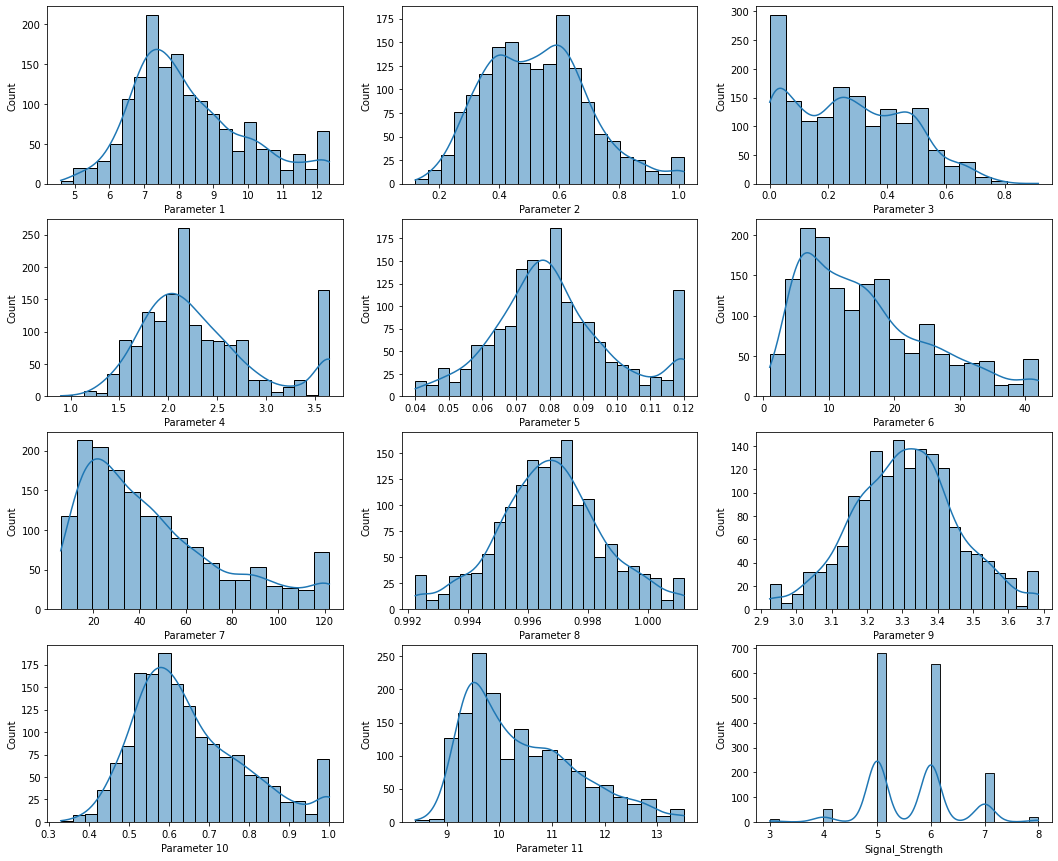

In [10]:
# Let us plot Histplot

plt.figure(figsize = (18,15))
i = 1
for j in df.describe().T.index:
  plt.subplot(4,3,i)
  sns.histplot(data = df, x = j, kde = True)
  i += 1
  if i > 12:
    break

Most of the parameters are normally distributed. But we can see that there is a huge numer at the start or at the end of the histogram, it is because we have replaced outlier values to the end of the whiskers. Let us keep that as it is.

We also have some negative numbers but we are not sure details of the parameters so we will keep them as it is.

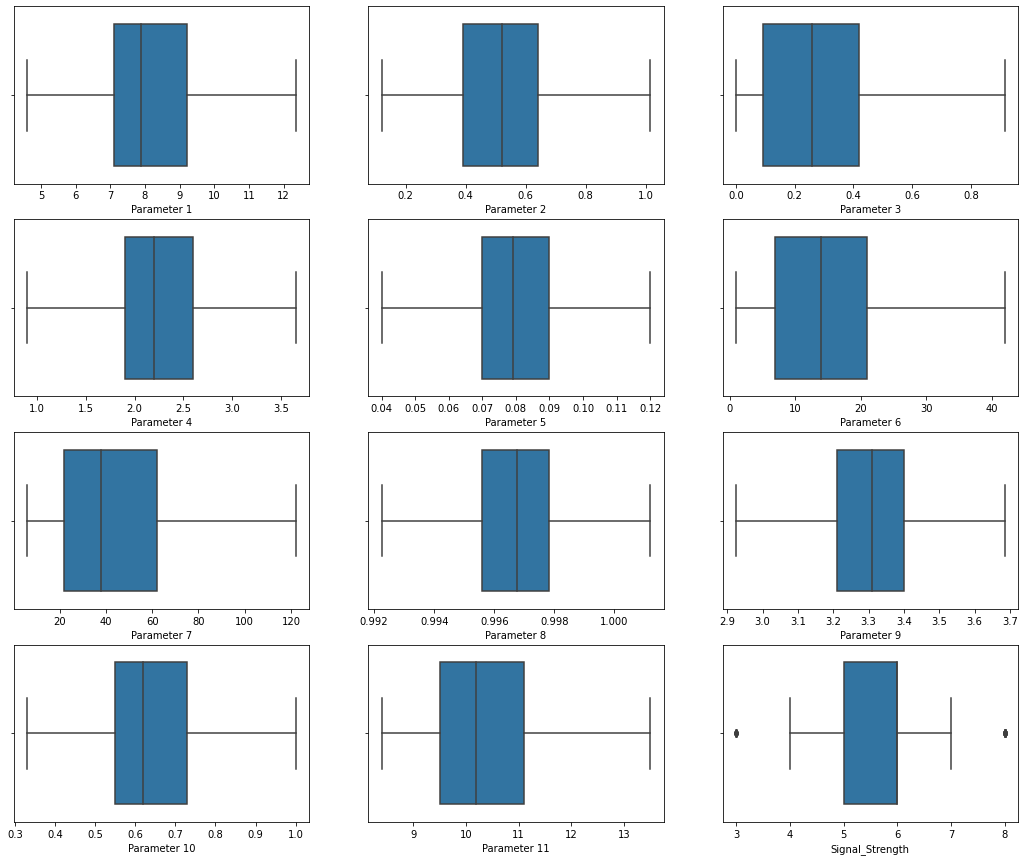

In [11]:
# Let us plot Histplot

plt.figure(figsize = (18,15))
i = 1
for j in df.describe().T.index:
  plt.subplot(4,3,i)
  sns.boxplot(data = df, x = j)
  i += 1
  if i > 12:
    break

We dont see any outliers present as we have removed them. 
A few parameters are skewed to one side.

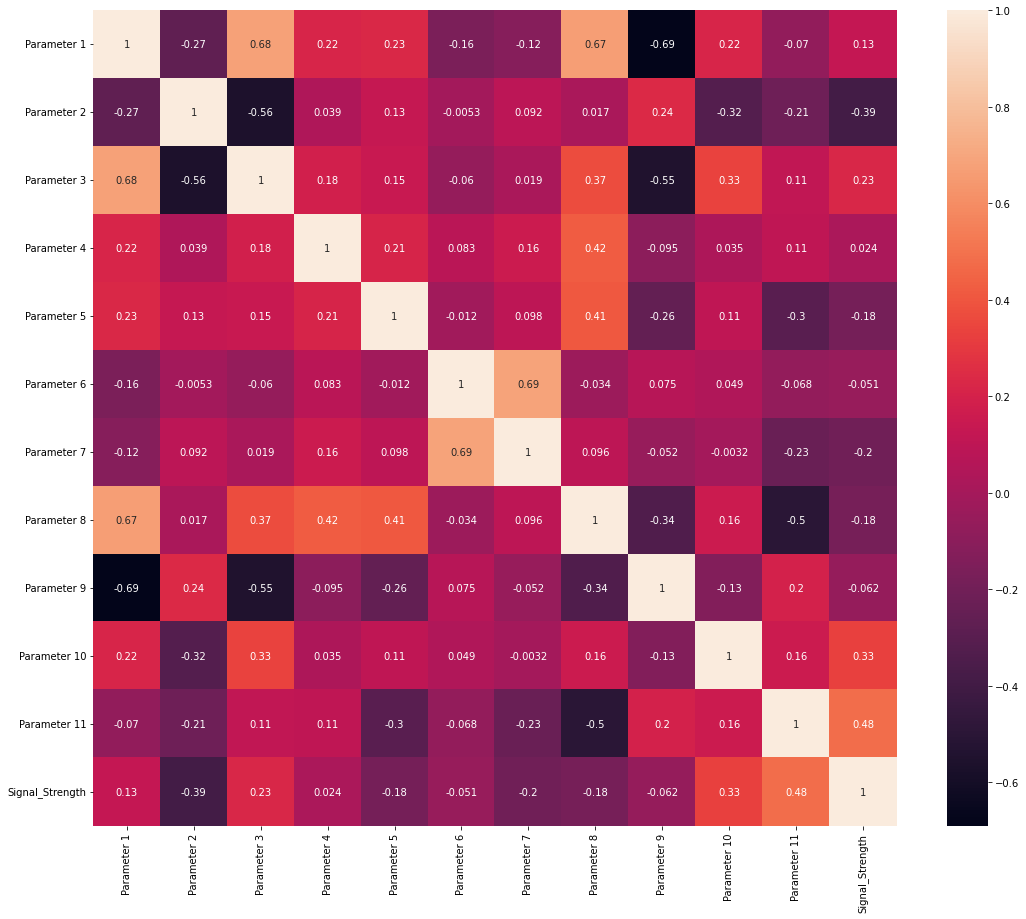

In [12]:
# Let us check heatmap

plt.figure(figsize = (18, 15))
sns.heatmap(df.corr(), annot = True);

There is no strong co-relation between any parameters.

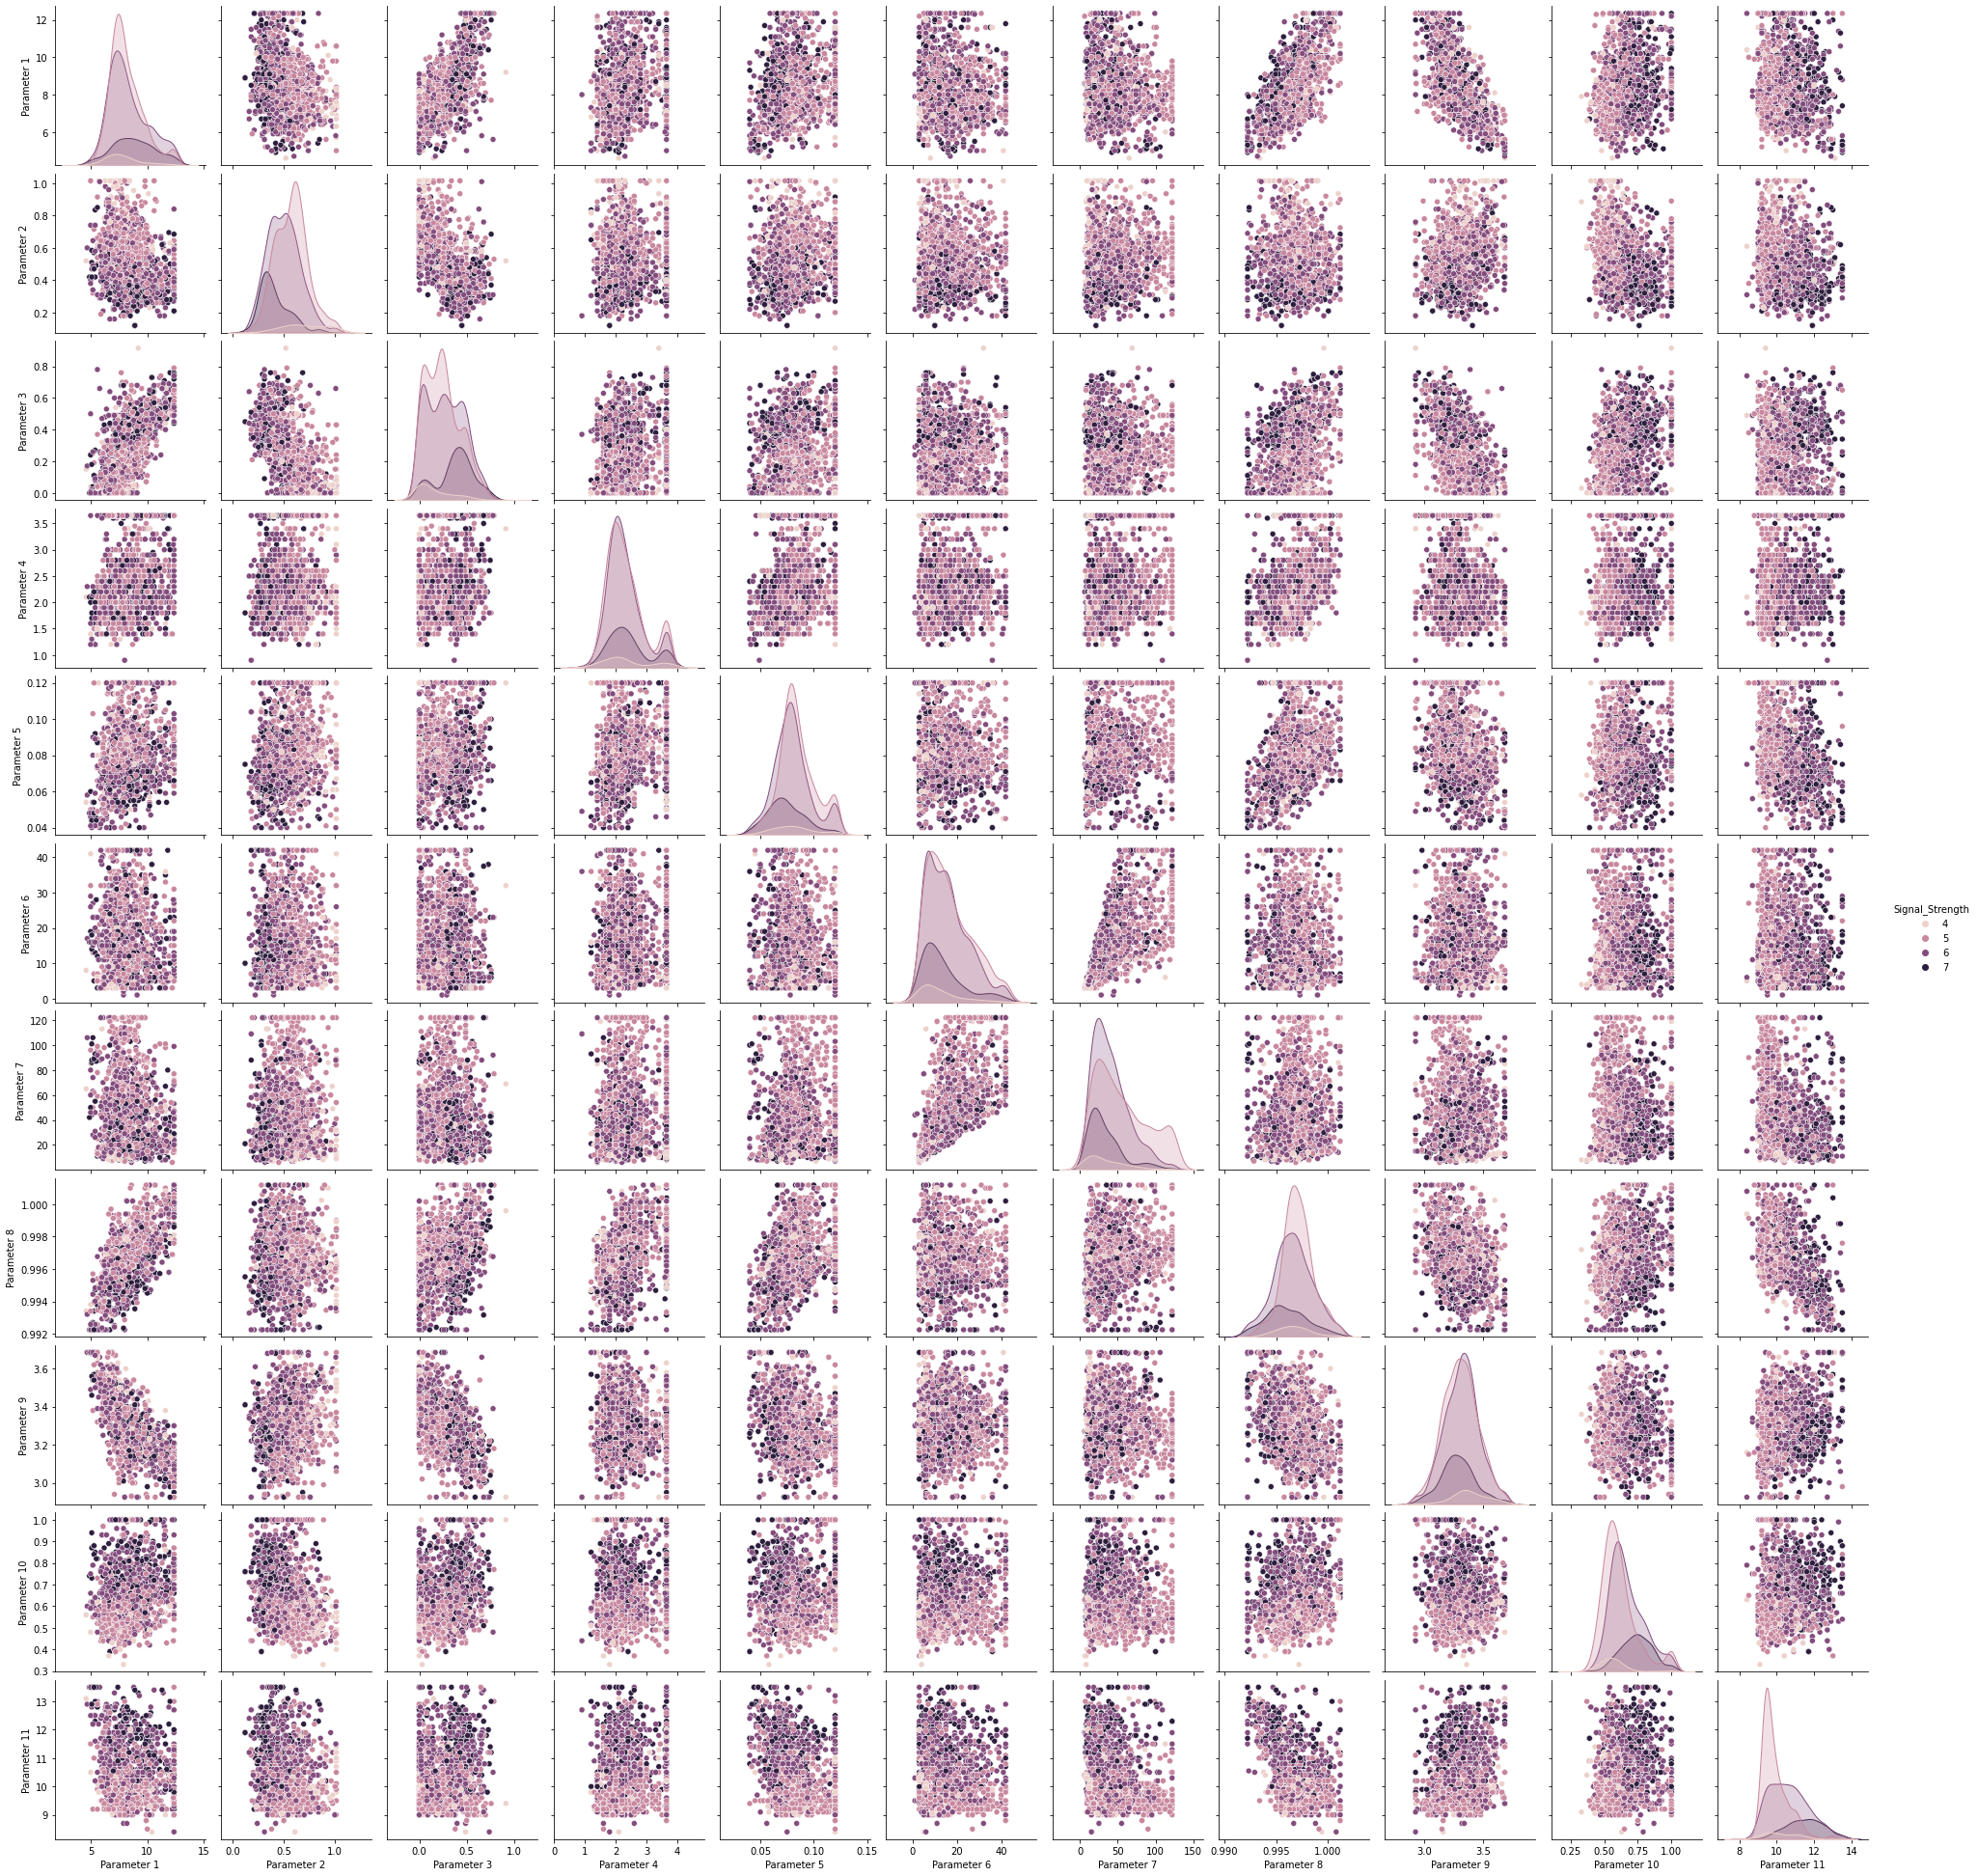

In [13]:
# Let us check pairplot
# We'll merge signal strength of 3 and 4 and 7 and 8.

data = df.copy()
data['Signal_Strength'] = data['Signal_Strength'].replace(3, 4)
data['Signal_Strength'] = data['Signal_Strength'].replace(8, 7)

sns.pairplot(data = data, hue = 'Signal_Strength');


In above pairplot we can see a few patterns and there is some relation between Signal_Strength and Parameters.

For example there is some co-relation between Parameter 3 with Parameter 1 and 2.

Also if we see Parameter 11 and 10, we can see that Signal Strength is more for higher values of both parameters and as it decreases Signal Strength is also decreasing.

Step 3: Design, train, tune and test a neural network regressor.

Hint: Use best approach to refine and tune the data or the model. Be highly experimental here

In [14]:
# Let us split the data

X = df.drop('Signal_Strength', axis = 1)
Y = df.iloc[:, -1:]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 33)

In [15]:
# Checking shape of the data

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1279, 11)
(1279, 1)
(320, 11)
(320, 1)


In [16]:
# As mentioned using Regressor

model = tf.keras.Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(50, kernel_initializer = 'he_uniform', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(50, kernel_initializer = 'he_normal', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(40, kernel_initializer = 'he_normal', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(40, kernel_initializer = 'he_normal', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(40, kernel_initializer = 'he_normal', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, kernel_initializer = 'he_normal'))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 40)

Epoch 1/10
32/32 [==============================] - 3s 15ms/step - loss: 10.6679 - accuracy: 0.0000e+00 - val_loss: 55.7011 - val_accuracy: 0.0000e+00
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 2.0296 - accuracy: 0.0000e+00 - val_loss: 5.6937 - val_accuracy: 0.0000e+00
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 1.4458 - accuracy: 0.0000e+00 - val_loss: 2.0250 - val_accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 1.2270 - accuracy: 0.0000e+00 - val_loss: 0.8304 - val_accuracy: 0.0000e+00
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 1.1140 - accuracy: 0.0000e+00 - val_loss: 0.6104 - val_accuracy: 0.0000e+00
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 1.0396 - accuracy: 0.0000e+00 - val_loss: 0.5332 - val_accuracy: 0.0000e+00
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 0.9235 - accuracy: 0.0000e+00 - val_l

As we can see that the regressor is not helping, so we will use classifier. We have a target as multiclassifier so it is incorrect to use regressor in this case. 

Let us use classifier

In [17]:
# Converting Target column to get output as 0, 1, 2, 3, 4, 5

Y_train = Y_train['Signal_Strength'] - 3
Y_test = Y_test['Signal_Strength'] - 3
Y_test.unique()

array([2, 4, 3, 5, 1, 0])

In [18]:
# Converting target data by one-hot encoding

Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 6)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes = 6)

In [19]:
# Let us try classifier NN model with more number of neurons

model = tf.keras.Sequential()

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, kernel_initializer = 'he_uniform', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, kernel_initializer = 'he_uniform', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(80, kernel_initializer = 'he_uniform', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(60, kernel_initializer = 'he_uniform', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(40, kernel_initializer = 'he_uniform', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(6, activation = 'softmax', kernel_initializer = 'he_normal'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 200, batch_size = 30)

Epoch 1/200
43/43 [==============================] - 2s 14ms/step - loss: 1.6481 - accuracy: 0.4152 - val_loss: 10.0184 - val_accuracy: 0.1219
Epoch 2/200
43/43 [==============================] - 0s 8ms/step - loss: 1.2858 - accuracy: 0.5778 - val_loss: 7.6305 - val_accuracy: 0.0719
Epoch 3/200
43/43 [==============================] - 0s 8ms/step - loss: 1.1966 - accuracy: 0.5817 - val_loss: 4.1224 - val_accuracy: 0.1000
Epoch 4/200
43/43 [==============================] - 0s 7ms/step - loss: 1.1155 - accuracy: 0.6099 - val_loss: 2.5341 - val_accuracy: 0.2531
Epoch 5/200
43/43 [==============================] - 0s 8ms/step - loss: 1.0313 - accuracy: 0.6278 - val_loss: 1.5405 - val_accuracy: 0.4844
Epoch 6/200
43/43 [==============================] - 0s 7ms/step - loss: 0.9803 - accuracy: 0.6357 - val_loss: 1.3521 - val_accuracy: 0.5500
Epoch 7/200
43/43 [==============================] - 0s 8ms/step - loss: 0.9351 - accuracy: 0.6333 - val_loss: 1.1402 - val_accuracy: 0.5406
Epoch 8/200

From above results we can see that we have got max Training accuracy as 89% with Validation accuracy as 62%. Also there is a significant difference between training loss and validation loss. 

So this shows that model is overfitted on training data. Let us try some other hyperparameters.

In [20]:
# Using lesser dense layer with kernal_regularizer and Dropout layer

model = tf.keras.Sequential()

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, kernel_initializer = 'he_uniform', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, kernel_initializer = 'he_normal', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(80, kernel_initializer = 'he_normal', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(80, kernel_initializer = 'he_normal', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(50, kernel_initializer = 'he_normal', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.2))

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(6, activation = 'softmax', kernel_initializer = 'he_normal'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 50)

Epoch 1/50
40/40 [==============================] - 2s 14ms/step - loss: 10.1600 - accuracy: 0.2244 - val_loss: 12.7807 - val_accuracy: 0.0125
Epoch 2/50
40/40 [==============================] - 0s 9ms/step - loss: 9.3290 - accuracy: 0.2893 - val_loss: 10.4441 - val_accuracy: 0.1469
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 8.6368 - accuracy: 0.3886 - val_loss: 9.3483 - val_accuracy: 0.2438
Epoch 4/50
40/40 [==============================] - 0s 8ms/step - loss: 8.0212 - accuracy: 0.4496 - val_loss: 8.1095 - val_accuracy: 0.3906
Epoch 5/50
40/40 [==============================] - 0s 8ms/step - loss: 7.5046 - accuracy: 0.4613 - val_loss: 7.2651 - val_accuracy: 0.4250
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 6.9872 - accuracy: 0.5043 - val_loss: 6.6873 - val_accuracy: 0.4531
Epoch 7/50
40/40 [==============================] - 0s 8ms/step - loss: 6.5155 - accuracy: 0.5113 - val_loss: 6.2061 - val_accuracy: 0.4719
Epoch 8/50
40/40

We are getting almost 60% accuracy n training as well as testing. Also loss for training and testing are almost similar. So we have tackled the problem of overfitting here, but we have quiet less accuracy. 

Let us try some more hyperparameters and see if we can improve this model further.

In [21]:
# With different activation function and more Neurons

model = tf.keras.Sequential()

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, kernel_regularizer = 'l2', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, kernel_regularizer = 'l2', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, kernel_regularizer = 'l2', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, kernel_regularizer = 'l2', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(80, kernel_regularizer = 'l2', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(50, kernel_regularizer = 'l2', input_shape = (11,)))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.3))

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(6, activation = 'softmax', kernel_initializer = 'he_normal'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 200, batch_size = 30)

Epoch 1/200
43/43 [==============================] - 3s 15ms/step - loss: 8.8444 - accuracy: 0.2283 - val_loss: 8.2505 - val_accuracy: 0.4000
Epoch 2/200
43/43 [==============================] - 0s 9ms/step - loss: 8.0359 - accuracy: 0.3487 - val_loss: 7.7788 - val_accuracy: 0.4000
Epoch 3/200
43/43 [==============================] - 0s 10ms/step - loss: 7.3063 - accuracy: 0.4668 - val_loss: 7.1510 - val_accuracy: 0.4000
Epoch 4/200
43/43 [==============================] - 0s 10ms/step - loss: 6.6674 - accuracy: 0.5293 - val_loss: 6.4220 - val_accuracy: 0.4125
Epoch 5/200
43/43 [==============================] - 0s 8ms/step - loss: 6.1786 - accuracy: 0.5168 - val_loss: 5.8515 - val_accuracy: 0.4250
Epoch 6/200
43/43 [==============================] - 0s 10ms/step - loss: 5.6868 - accuracy: 0.5199 - val_loss: 5.3408 - val_accuracy: 0.4406
Epoch 7/200
43/43 [==============================] - 0s 9ms/step - loss: 5.2302 - accuracy: 0.5192 - val_loss: 4.8931 - val_accuracy: 0.4469
Epoch 8/2

We are still getting around 60% accuracy. We reached 60% withing 50 epochs. So no need to use more epochs. 

And model is not improving after one point.

In [22]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(50, kernel_initializer = 'he_uniform', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(40, kernel_initializer = 'he_normal', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(30, kernel_initializer = 'he_normal', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(20, kernel_initializer = 'he_normal', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, kernel_initializer = 'he_normal', kernel_regularizer = 'l2', input_shape = (11,), activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.2))

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(6, activation = 'softmax', kernel_initializer = 'he_normal'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 40)

Epoch 1/100
32/32 [==============================] - 2s 17ms/step - loss: 5.1978 - accuracy: 0.1900 - val_loss: 6.6319 - val_accuracy: 0.1187
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 4.9328 - accuracy: 0.2142 - val_loss: 5.1940 - val_accuracy: 0.1219
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 4.7056 - accuracy: 0.2455 - val_loss: 4.5677 - val_accuracy: 0.1594
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 4.4504 - accuracy: 0.2697 - val_loss: 4.2922 - val_accuracy: 0.3063
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 4.2228 - accuracy: 0.3292 - val_loss: 4.0409 - val_accuracy: 0.4031
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 4.0624 - accuracy: 0.3393 - val_loss: 3.8419 - val_accuracy: 0.4563
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 3.8753 - accuracy: 0.3956 - val_loss: 3.6444 - val_accuracy: 0.4625
Epoch 8/100


Loss is below 1 otherwise there is no improvement in the model.

Tried different hyperparameters, but accuracy is not improving. And even if we are using lesser neurons we are getting accuracy up to 60%. So let us finalize this model.

Step 4. Pickle the model for future use.

We will use the last model where we have got accuracy of approx 60%.

**Part 2**

We will build a digit classifier on the SVHN (Street View Housing Number) dataset

Step 1. Import the data.

In [23]:
# Importing data from drive

import h5py

df = h5py.File('/content/drive/MyDrive/Colab Notebooks/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

Step 2. Data pre-processing and visualisation.

In [24]:
X_test = np.array(df['X_test'])
X_train = np.array(df['X_train'])
y_test = np.array(df['y_test'])
y_train = np.array(df['y_train'])

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(18000, 32, 32)
(42000, 32, 32)
(18000,)
(42000,)


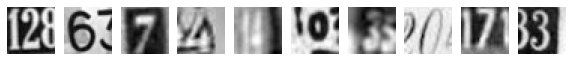

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [25]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

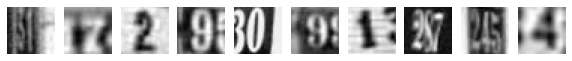

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [26]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

Step 3. Design, train, tune and test a neural network image classifier.

Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.

Step 4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same.

In [28]:
# Model 1

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,), input_shape = (32, 32)))

# Layer 1
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(70, activation = 'ReLU'))

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 80)

Epoch 1/80
1313/1313 [==============================] - 6s 4ms/step - loss: 1.7765 - accuracy: 0.4157 - val_loss: 1.2748 - val_accuracy: 0.6261
Epoch 2/80
1313/1313 [==============================] - 6s 4ms/step - loss: 1.2870 - accuracy: 0.5982 - val_loss: 1.0505 - val_accuracy: 0.6982
Epoch 3/80
1313/1313 [==============================] - 6s 4ms/step - loss: 1.1602 - accuracy: 0.6375 - val_loss: 1.0355 - val_accuracy: 0.6931
Epoch 4/80
1313/1313 [==============================] - 6s 4ms/step - loss: 1.0839 - accuracy: 0.6625 - val_loss: 1.0491 - val_accuracy: 0.6789
Epoch 5/80
1313/1313 [==============================] - 6s 4ms/step - loss: 1.0258 - accuracy: 0.6808 - val_loss: 0.8707 - val_accuracy: 0.7468
Epoch 6/80
1313/1313 [==============================] - 6s 4ms/step - loss: 0.9806 - accuracy: 0.6953 - val_loss: 0.8919 - val_accuracy: 0.7386
Epoch 7/80
1313/1313 [==============================] - 6s 4ms/step - loss: 0.9426 - accuracy: 0.7077 - val_loss: 0.8000 - val_accuracy:

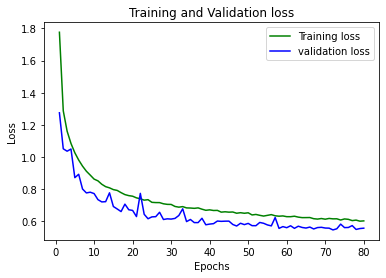

In [29]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 81)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

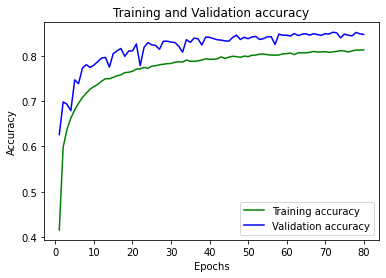

In [30]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1, 81)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We started with one hidden layer with small number of neurons. We have got max validation accracy of 85% which is good enough.

But from graph we can see that the validation accuracy is fluctuating a lot. But this model has a good learning rate.

Let us tune the model with different hyperparameters.

In [31]:
# Model 2

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((1024,), input_shape = (32, 32)))

# Layer 1
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.3))

# Layer 2
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

# Layer 3
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(80, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 80, batch_size = 35)

Epoch 1/80
1200/1200 [==============================] - 7s 5ms/step - loss: 1.9411 - accuracy: 0.3222 - val_loss: 1.2483 - val_accuracy: 0.6272
Epoch 2/80
1200/1200 [==============================] - 6s 5ms/step - loss: 1.4764 - accuracy: 0.5135 - val_loss: 1.0702 - val_accuracy: 0.6914
Epoch 3/80
1200/1200 [==============================] - 6s 5ms/step - loss: 1.3550 - accuracy: 0.5631 - val_loss: 1.0005 - val_accuracy: 0.7107
Epoch 4/80
1200/1200 [==============================] - 6s 5ms/step - loss: 1.2948 - accuracy: 0.5886 - val_loss: 0.9453 - val_accuracy: 0.7284
Epoch 5/80
1200/1200 [==============================] - 6s 5ms/step - loss: 1.2457 - accuracy: 0.6044 - val_loss: 0.8881 - val_accuracy: 0.7477
Epoch 6/80
1200/1200 [==============================] - 6s 5ms/step - loss: 1.2019 - accuracy: 0.6212 - val_loss: 0.8870 - val_accuracy: 0.7443
Epoch 7/80
1200/1200 [==============================] - 6s 5ms/step - loss: 1.1757 - accuracy: 0.6300 - val_loss: 0.8361 - val_accuracy:

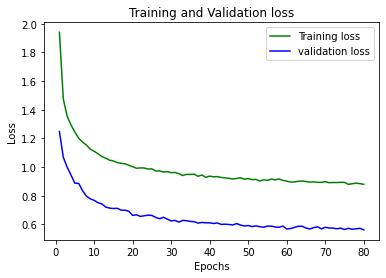

In [32]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 81)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

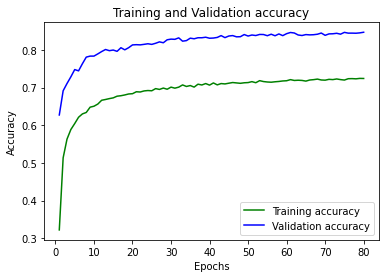

In [33]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1, 81)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We have added three hidden layers and got the accuracy of around 84%. It is lesser than what we got in a single layer.

Validation and training accuracy and loss are not crossing each other. This is not that good model. It has a high leaning rate.

Let us try different hyperparameters.

In [34]:
# Model 3

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((1024,), input_shape = (32, 32)))

# Layer 1
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(80, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.1))

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 180, batch_size = 55)

Epoch 1/180
764/764 [==============================] - 6s 7ms/step - loss: 1.7158 - accuracy: 0.4243 - val_loss: 1.1189 - val_accuracy: 0.6622
Epoch 2/180
764/764 [==============================] - 5s 6ms/step - loss: 1.2501 - accuracy: 0.6013 - val_loss: 0.9494 - val_accuracy: 0.7228
Epoch 3/180
764/764 [==============================] - 5s 6ms/step - loss: 1.1306 - accuracy: 0.6440 - val_loss: 0.9242 - val_accuracy: 0.7157
Epoch 4/180
764/764 [==============================] - 5s 7ms/step - loss: 1.0522 - accuracy: 0.6681 - val_loss: 0.8311 - val_accuracy: 0.7533
Epoch 5/180
764/764 [==============================] - 5s 6ms/step - loss: 1.0044 - accuracy: 0.6863 - val_loss: 0.7503 - val_accuracy: 0.7816
Epoch 6/180
764/764 [==============================] - 5s 7ms/step - loss: 0.9564 - accuracy: 0.7000 - val_loss: 0.7383 - val_accuracy: 0.7897
Epoch 7/180
764/764 [==============================] - 5s 7ms/step - loss: 0.9277 - accuracy: 0.7096 - val_loss: 0.6985 - val_accuracy: 0.7980

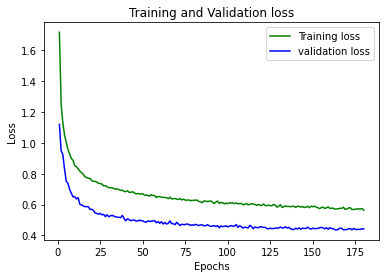

In [35]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 181)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

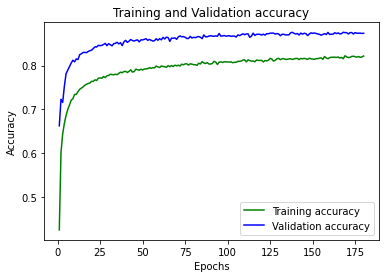

In [36]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1, 181)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy has improved compared to the previous model. It has reached 87%.

But graph is almost same. Training and validation are not crossing. It is not very good model.

Let us try more layers with more neurons.

In [37]:
# Model 4

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((1024,), input_shape = (32, 32)))

# Layer 1
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(500, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

# Layer 2
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(400, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

# Layer 3
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(300, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

# Layer 4
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.1))

# Layer 5
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(80, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.1))

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 140, batch_size = 75)

Epoch 1/140
560/560 [==============================] - 5s 6ms/step - loss: 1.6066 - accuracy: 0.4629 - val_loss: 1.0258 - val_accuracy: 0.6719
Epoch 2/140
560/560 [==============================] - 3s 6ms/step - loss: 1.1386 - accuracy: 0.6378 - val_loss: 0.8833 - val_accuracy: 0.7262
Epoch 3/140
560/560 [==============================] - 3s 6ms/step - loss: 1.0314 - accuracy: 0.6739 - val_loss: 0.8303 - val_accuracy: 0.7423
Epoch 4/140
560/560 [==============================] - 3s 6ms/step - loss: 0.9547 - accuracy: 0.6993 - val_loss: 0.7517 - val_accuracy: 0.7753
Epoch 5/140
560/560 [==============================] - 3s 6ms/step - loss: 0.8821 - accuracy: 0.7238 - val_loss: 0.7342 - val_accuracy: 0.7746
Epoch 6/140
560/560 [==============================] - 3s 6ms/step - loss: 0.8452 - accuracy: 0.7369 - val_loss: 0.6798 - val_accuracy: 0.7961
Epoch 7/140
560/560 [==============================] - 3s 6ms/step - loss: 0.8069 - accuracy: 0.7483 - val_loss: 0.6433 - val_accuracy: 0.8079

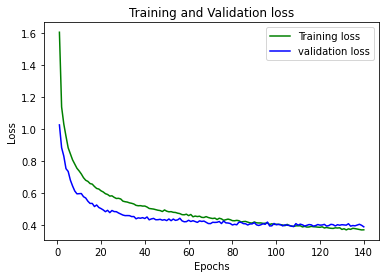

In [38]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 141)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

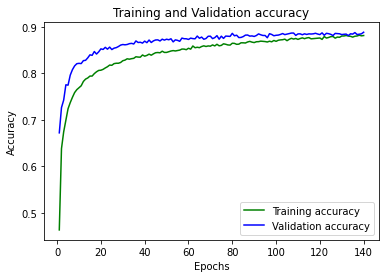

In [39]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1, 141)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We are getting almost 89% accuracy. We can finalize this model.

From graph we can say that 100-140 epochs will be good enough. We are also getting better accuracy here.

Let us try a few more hypertuning.

In [40]:
# Model 5

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((1024,), input_shape = (32, 32)))

# Layer 1
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(800, activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.1))

# Layer 2
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(500, activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.1))

# Layer 3
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(400, activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.1))

# Layer 4
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(400, activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.1))

# Layer 5
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, activation = 'ReLU'))
model.add(tf.keras.layers.Dropout(0.1))

# Output Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, batch_size = 70)

Epoch 1/30
600/600 [==============================] - 5s 6ms/step - loss: 1.5642 - accuracy: 0.4828 - val_loss: 1.0519 - val_accuracy: 0.6651
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 1.0268 - accuracy: 0.6715 - val_loss: 0.8527 - val_accuracy: 0.7282
Epoch 3/30
600/600 [==============================] - 4s 7ms/step - loss: 0.8965 - accuracy: 0.7128 - val_loss: 0.7224 - val_accuracy: 0.7726
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.8029 - accuracy: 0.7439 - val_loss: 0.6915 - val_accuracy: 0.7827
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.7356 - accuracy: 0.7672 - val_loss: 0.6395 - val_accuracy: 0.7979
Epoch 6/30
600/600 [==============================] - 4s 6ms/step - loss: 0.6832 - accuracy: 0.7828 - val_loss: 0.6021 - val_accuracy: 0.8103
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.6473 - accuracy: 0.7949 - val_loss: 0.5897 - val_accuracy: 0.8180
Epoch 

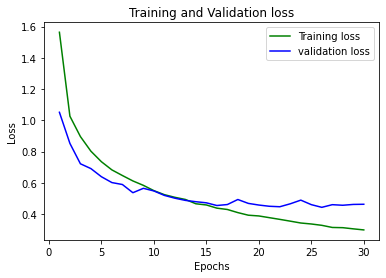

In [41]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

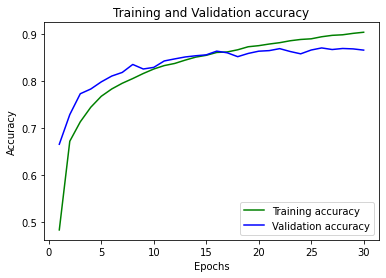

In [42]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1, 31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We see that the model is getting overfitted at the last.

From graph we can keep epochs of around 15. And on 15th epoch we are getting an accuracy of 85% which is pretty good. But we have got more accuracy in earlier model.


**Let us finalize the Model 4 with 89% accuracy.**